Target - Interest Rate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
credit_df = pd.read_csv('credit.csv')
credit_df

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.00,36.0
1,12.12,715-719,19200.0,19200.00,36.0
2,21.98,690-694,35000.0,35000.00,60.0
3,9.99,695-699,10000.0,9975.00,36.0
4,11.71,695-699,12000.0,12000.00,36.0
...,...,...,...,...,...
2493,16.77,705-709,30000.0,29950.00,60.0
2494,14.09,740-744,16000.0,16000.00,60.0
2495,13.99,680-684,10000.0,10000.00,36.0
2496,12.42,675-679,6000.0,6000.00,36.0


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [4]:
# double check for nulls/missing values
credit_df.isna().sum()

interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

In [5]:
credit_df.isnull().sum()

interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

In [6]:
# Convert FICO score to a float and break the columns up
credit_df['fico_low'] = credit_df['fico_range'].str.split('-').str[0].astype(int)
credit_df['fico_high'] = credit_df['fico_range'].str.split('-').str[1].astype(int)

# Get the average of the low and high scores and put those into a new column
credit_df['avg_fico_score'] = (credit_df['fico_low'] + credit_df['fico_high']) /2

# Drop columns I don't need anymore
credit_df.drop(['fico_range', 'fico_low', 'fico_high', 'amount_funded_by_investors'], axis=1, inplace=True)


In [ ]:
# Alternative Way
# def get_avg_score(x):
#     scores = x.split("-")
#     val_one = int(scores[0])
#     val_two = int(scores[1]) 
#     return np.mean([val_one, val_two])


In [ ]:
# credit_df['second_fico_avg'] = credit_df['fico_range']. apply(get_avg_score)

In [7]:
credit_df

,interest_rate,amount_requested,loan_length,avg_fico_score
0,8.90,20000.0,36.0,737.0
1,12.12,19200.0,36.0,717.0
2,21.98,35000.0,60.0,692.0
3,9.99,10000.0,36.0,697.0
4,11.71,12000.0,36.0,697.0
...,...,...,...,...
2493,16.77,30000.0,60.0,707.0
2494,14.09,16000.0,60.0,742.0
2495,13.99,10000.0,36.0,682.0
2496,12.42,6000.0,36.0,677.0


In [8]:
# check again for missing values
credit_df.isnull().sum()

interest_rate       0
amount_requested    0
loan_length         0
avg_fico_score      0
dtype: int64

In [10]:
# plots to visualize correlations
# sns.pairplot(credit_df)
# plt.suptitle('Pairplot')

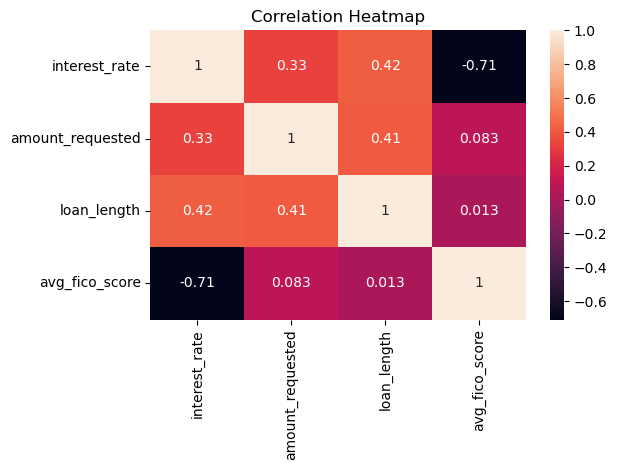

In [11]:
sns.heatmap(credit_df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()

In [12]:
# define features (X) and target (y)
X = credit_df[['avg_fico_score', 'amount_requested', 'loan_length']]
y = credit_df['interest_rate']

In [13]:
# Standardize using scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Split it
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# train it
lin_model = LinearRegression()


In [16]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [21]:
# make predictions
y_predict = lin_model.predict(X_test)


In [ ]:
# Get r2 to see how well the model is predicting in comparison to true values. 
r2 = r2_score(y_test, y_predict)
r2
# 0.73 r2 meaning predictions match true values fairly well
# Model predicts interest rates with ~73% accuracy based on the factors of credit score, how much to borrow, and loan length


0.7271775786436767

In [19]:
# Get root mean squared error to get prediction error in same units as target (percent interest rate)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse
# 2% average interest rate prediction error

2.16354133816884

#### Questions:
1. Clearly state the goal of your project (what were you exploring? what scientific question did you ask?)
    - Goal: Help new business owners understand what factors can affect their loan interest rates.
    - Scientific Question: What characteristics most strongly influence the interest rate on a loan?
2. Describe the data.
    - What features (columns) did you have to work with? What features were you interested in?
        - fico_range, amount_requested, amount_funded_by_investors, loan_length, interest_rate
        - Since I was calculating the interest_rate I was mostly interested in fico_range, loan_length, and amount_requested so I decided to focus on these features as I felt they would directly influence credit worthiness.
    - Were the features numerical/categorical/text?
        - All features were numerical except fico_range which was categorical and converted into a numerical value. 
    - Was a lot of data missing or other problems? If so,, what did you do to handle it?
        - There was no missing data, the only main problem was that the fico-range column was a string value. I converted that column in a single fico score by averaging the range values. Once I put this average value in a new column I dropped the fico-range column. 
        - I also dropped the amount-funded-by-investors column because it was the same as the amount-requested and did not add any extra value.
    - How did features relate to each other, and the values that you were interested in? (Include pictures)
        - The pairplot and heat map showed a strong negative correlation between interest rate and avg_fico_score which can be interpreted as the higher the avg_fico_score the lower the interest rate. There was also a minimal positive correlation between interest rate and loan amount. Lastly, there was a more moderate positive correlation between loan length and interest rate, indicating that longer loan lengths may lead to higher interest rates. 
3. Clearly state the steps you took to build your model. 
    1. Loaded and Prepared the Data, made sure there were no missing values, cleaned and transformed fico_range to avg_fico_score
    2. Created a heatmap to visualize and better understand initial correlations in the data.
    3. Standardized the features of the data so they could be compared fairly in the model
    4. Used a Linear Regression model to train the data on 80% of the data and tested it on the remaining 20%
    5. Evaluated the model using R2 and RMSE and interpreted the results. 

Interpretation:
- Higher FICO + Short Loan Length = Low Interest Rate.

Text(0.5, 1.0, 'Residual Plot of Predicted Interest Rates Against Residuals')

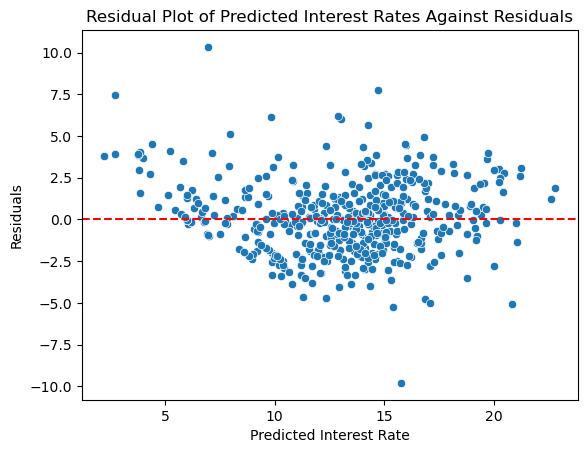

In [29]:
# Residual Plot
residuals = y_test - y_predict

sns.scatterplot(x=y_predict, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Interest Rate')
plt.ylabel('Residuals')
plt.title('Residual Plot of Predicted Interest Rates Against Residuals')

C:\Users\thatc\AppData\Local\Temp\ipykernel_21760\2594571981.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


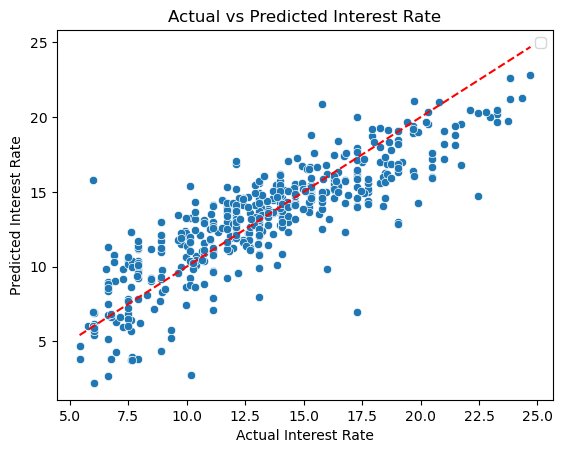

In [32]:
# Actual vs Predicted
sns.scatterplot(x=y_test, y=y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Interest Rate')
plt.ylabel('Predicted Interest Rate')
plt.title('Actual vs Predicted Interest Rate')
plt.legend()

In [26]:
# Pipeline - AI assisted
from sklearn.pipeline import Pipeline

features = ['avg_fico_score', 'amount_requested', 'loan_length']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_predict = pipeline.predict(X_test)
r2 = r2_score(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))

model = pipeline.named_steps['linreg']
scaler = pipeline.named_steps['scaler']
coeffecients = pd.Series(model.coef_, index=features)

print('Model Performance:')
print(f'R2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print('\nFeature Coefficients:')
print(coeffecients)

Model Performance:
R2: 0.73
RMSE: 2.16

Feature Coefficients:
avg_fico_score     -3.087301
amount_requested    1.078141
loan_length         1.381447
dtype: float64
